# Exercise A-2: Linear Mappings and Least Squares

1. A linear mapping: $\mathbb{R}^n \to \mathbb{R}^m$ is not always given in practice by explicitly specifying its coefficient matrix $A \in \mathbb{R}^{m \times n}$, but simply by a function procedure that returns the value $Ax \in \mathbb{R}^m$ for a given vector $x \in \mathbb{R}^n$. 

    Assume that such an evaluation procedure $x \to Ax$ is provided. 
    
    Use such a procedure to explicitly reconstruct the coefficient matrix $A$. Implement and test a concrete example (e.g., for $n = 4$).

2. Given data values $\{(t_j, \tilde{y}_j), \, j = 1, \ldots, m\}$, determine a quadratic function:

    $\alpha + \beta t + \gamma t^2$

    such that

    $\phi(\alpha, \beta, \gamma) = \dots$
    
    is minimized in the least-squares sense. Details are intentionally not specified here. 
    
    Your task is to implement this and solve a specific example. 
    
    This task is analogous to the problem of determining the "best fit line" (with only two parameters $\alpha, \beta$ to be determined). 
    
    Notation as in the lecture notes, particularly regarding the function $\phi$ to be minimized.

    This task leads to a linear $3 \times 3$ system (Gaussian normal equations, see the lecture notes). 
    
    Solve this system using an elimination method, e.g., by hand or using available numerical software, most easily Matlab (see Exercise 8).

3. Also, create a graphical visualization of your solution.

In [30]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix, Identity, Transpose, Eq, init_printing, symbols, latex, det, pi, cos, sin
from sympy.abc import A
from IPython.display import display, Math

In [31]:
# Pre-requisites for pretty printing
init_printing()

In [32]:
# Function to format matrices dynamically for LaTeX
def format_matrix(name, matrix):
    return f"{name} = " + latex(matrix)
# Function to format determinants dynamically for LaTeX
def format_determinant(name, determinant):
    return f"\\det({name}) = " + latex(determinant)
# Function to format vectors dynamically for LaTeX
def format_vector(name, vector):
    return f"{name} = " + latex(vector)
def format_dot_product(name, matrix1: Matrix, matrix2: Matrix):
    result = matrix1 * matrix2
    # Start LaTeX formatting
    latex_str = f"{name} = \\begin{{bmatrix}}\n"
    # Iterate over the result matrix to format each cell
    for i in range(result.rows):
        row_operations = []
        for j in range(result.cols):
            terms = []
            for k in range(matrix1.cols):
                terms.append(f"{matrix1[i, k]} \\cdot {matrix2[k, j] if matrix2.shape[1] > 1 else matrix2[k]}")
            operation = " + ".join(terms)
            row_operations.append(f"({operation})")
        latex_str += " & ".join(row_operations) + " \\\\\n"

    latex_str += "\\end{bmatrix} = " + latex(result)
    return latex_str

# Solution for 1)

A linear mapping: $\mathbb{R}^n \to \mathbb{R}^m$ is not always given in practice by explicitly specifying its coefficient matrix $A \in \mathbb{R}^{m \times n}$, but simply by a function procedure that returns the value $Ax \in \mathbb{R}^m$ for a given vector $x \in \mathbb{R}^n$. 

Assume that such an evaluation procedure $x \to Ax$ is provided. 

Use such a procedure to explicitly reconstruct the coefficient matrix $A$. Implement and test a concrete example (e.g., for $n = 4$).


$
\textbf{Step 1: Setup}
$

Assume we have a linear mapping
$
f: \mathbb{R}^n \to \mathbb{R}^m,
$
and that for any $ x \in \mathbb{R}^n $, we can compute $ f(x) \in \mathbb{R}^m $. 

We know $ f $ is linear, i.e.,
$
f(x+y) = f(x) + f(y), \quad f(\alpha x) = \alpha f(x), \quad \forall x,y \in \mathbb{R}^n,, \alpha \in \mathbb{R}.
$

There exists a matrix $ A \in \mathbb{R}^{m \times n} $ such that
$
f(x) = A x.
$

$
\textbf{Step 2: Standard Basis and Matrix Reconstruction}
$

Let $ { e_1, e_2, \dots, e_n } $ denote the standard basis of $\mathbb{R}^n$, where
$
e_j = (0, \dots, 0, 1, 0, \dots, 0)^T,
$
with the $1$ in the $j$-th position and zeros elsewhere.

Since $ f $ is linear and $ f(x) = A x $, we have
$
f(e_j) = A e_j.
$

But the matrix-vector product $ A e_j $ simply extracts the $ j $-th column of $ A $. Thus, if we evaluate $ f $ at each of the standard basis vectors, we obtain all the columns of $ A $:
$
A = \bigl[ f(e_1) \mid f(e_2) \mid \cdots \mid f(e_n) \bigr].
$

$
\textbf{Step 3: Implementation Details}
$

1. Define a function that given $ x \in \mathbb{R}^n $, returns $ f(x) \in \mathbb{R}^m $.
2. Construct the standard basis vectors $ e_1, e_2, \dots, e_n $.
3. Evaluate $ f(e_j) $ for each $ j = 1, 2, \dots, n $.
4. Assemble the results into the columns of a matrix $ A $.

$
\textbf{Example: } n = 4, m = 3
$

For example, let
$
A = \begin{pmatrix}
1 & 2 & 3 & 4 \\
0 & -1 & 5 & 2 \\
2 & 1 & 0 & 7
\end{pmatrix}.
$

If the only access we have to $ A $ is through a function $ f(x) = A x $, then by evaluating:
$
f(e_1) = \begin{pmatrix} 1 \ 0 \ 2 \end{pmatrix}, \quad
f(e_2) = \begin{pmatrix} 2 \ -1 \ 1 \end{pmatrix}, \quad
f(e_3) = \begin{pmatrix} 3 \ 5 \ 0 \end{pmatrix}, \quad
f(e_4) = \begin{pmatrix} 4 \ 2 \ 7 \end{pmatrix}.
$

Thus, reconstructing $ A $:
$
A = \bigl[f(e_1) \mid f(e_2) \mid f(e_3) \mid f(e_4)\bigr]
= \begin{pmatrix}
1 & 2 & 3 & 4 \\
0 & -1 & 5 & 2 \\
2 & 1 & 0 & 7
\end{pmatrix}.
$


In [33]:
# Define dimensions
m, n = 3, 4  # for example

# Define a specific matrix A (which we pretend we do not know explicitly in practice)
A = Matrix([
    [1,   2,  3,  4],
    [0,  -1,  5,  2],
    [2,   1,  0,  7]
])

# Define the linear mapping f: R^n -> R^m as f(x) = A*x
def f(x):
    # x is assumed to be an n-dimensional column vector (Sympy Matrix)
    return A*x

# Display the original A for reference
display(Math(r"A = " + latex(A)))

# Step-by-step reconstruction:
# 1. Construct standard basis vectors e_1, e_2, ..., e_n in R^n
e_vectors = []
for j in range(n):
    # Create a vector of length n with a 1 in the j-th position and 0 elsewhere
    e = Matrix([1 if i == j else 0 for i in range(n)])
    display(Math(r"e_{%d} = " % (j+1) + latex(e)))
    e_vectors.append(e)

# 2. Apply f to each standard basis vector to get columns of A
reconstructed_cols = []
for j, e in enumerate(e_vectors, start=1):
    fe = f(e)
    # Display the calculation: f(e_j)
    display(Math(r"f(e_{%d}) = A e_{%d} = " % (j, j) + latex(fe)))
    reconstructed_cols.append(fe)

# 3. Form the reconstructed matrix
A_reconstructed = Matrix.hstack(*reconstructed_cols)

# Display the reconstructed matrix
display(Math(r"\text{Reconstructed } A = " + latex(A_reconstructed)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [34]:
def linear_map(x):
    """Simulated linear mapping x -> Ax."""
    A = np.array([[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12]])  # Predefined matrix
    return A @ x

def reconstruct_matrix(linear_map, n):
    """Reconstructs matrix A using the linear mapping procedure."""
    # Create standard basis vectors
    basis_vectors = np.eye(n)
    display(Math(format_matrix("E", Matrix(basis_vectors))))
    
    # Map each basis vector through the linear mapping
    mapped_columns = []
    for i in range(n):
        mapped_column = linear_map(basis_vectors[:, i])
        display(Math(f"Ax_{{{i+1}}} = {latex(Matrix(mapped_column))}"))
        mapped_columns.append(mapped_column)
    
    # Stack the mapped columns to form the matrix
    A_reconstructed = np.column_stack(mapped_columns)
    display(Math(format_matrix("A_{reconstructed}", Matrix(A_reconstructed))))
    return A_reconstructed

n = 4
A_reconstructed = reconstruct_matrix(linear_map, n)
A_reconstructed_sympy = Matrix(A_reconstructed)

display(Math(format_matrix("A", A_reconstructed_sympy)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Solution for 2)

Given data values $\{(t_j, \tilde{y}_j), \, j = 1, \ldots, m\}$, determine a quadratic function:

$\alpha + \beta t + \gamma t^2$

such that

$\phi(\alpha, \beta, \gamma) = \dots$

is minimized in the least-squares sense. Details are intentionally not specified here. 

Your task is to implement this and solve a specific example. 

This task is analogous to the problem of determining the "best fit line" (with only two parameters $\alpha, \beta$ to be determined). 

Notation as in the lecture notes, particularly regarding the function $\phi$ to be minimized.

This task leads to a linear $3 \times 3$ system (Gaussian normal equations, see the lecture notes). 

Solve this system using an elimination method, e.g., by hand or using available numerical software, most easily Matlab (see Exercise 8).

$
\textbf{Step 1: Problem Setup}
$

We are given data points $(t_j, \tilde{y}*j)$ for $ j = 1, \ldots, m $. We want to find parameters $\alpha, \beta, \gamma \in \mathbb{R}$ such that the quadratic model
$
y(t) = \alpha + \beta t + \gamma t^2
$
best fits the data in a least-squares sense. That is, we want to minimize the objective function
$
\phi(\alpha, \beta, \gamma) = \sum*{j=1}^m \bigl( \tilde{y}_j - (\alpha + \beta t_j + \gamma t_j^2) \bigr)^2.
$

$
\textbf{Step 2: Least Squares Formulation}
$

To find the minimizing parameters, we set the partial derivatives of $\phi$ with respect to $\alpha, \beta, \gamma$ to zero. Let
$
r_j(\alpha, \beta, \gamma) = \tilde{y}*j - (\alpha + \beta t_j + \gamma t_j^2)
$
be the residual for the $j$-th data point. Then
$
\phi(\alpha, \beta, \gamma) = \sum*{j=1}^m r_j(\alpha,\beta,\gamma)^2.
$

The normal equations are derived as follows:

$
\frac{\partial \phi}{\partial \alpha} = \sum_{j=1}^m 2r_j(-1) = 0, \quad
\frac{\partial \phi}{\partial \beta} = \sum_{j=1}^m 2r_j(-t_j) = 0, \quad
\frac{\partial \phi}{\partial \gamma} = \sum_{j=1}^m 2r_j(-t_j^2) = 0.
$

Eliminating the factor 2, we have the system:
$
\sum_{j=1}^m (\tilde{y}*j - (\alpha + \beta t_j + \gamma t_j^2)) = 0,
$
$
\sum*{j=1}^m t_j(\tilde{y}*j - (\alpha + \beta t_j + \gamma t_j^2)) = 0,
$
$
\sum*{j=1}^m t_j^2(\tilde{y}_j - (\alpha + \beta t_j + \gamma t_j^2)) = 0.
$

Expanding these equations and grouping by $\alpha, \beta, \gamma$:

1. For the $\alpha$-equation:
   $
   \sum_{j=1}^m \tilde{y}*j = \alpha \sum*{j=1}^m 1 + \beta \sum_{j=1}^m t_j + \gamma \sum_{j=1}^m t_j^2.
   $

2. For the $\beta$-equation:
   $
   \sum_{j=1}^m t_j \tilde{y}*j = \alpha \sum*{j=1}^m t_j + \beta \sum_{j=1}^m t_j^2 + \gamma \sum_{j=1}^m t_j^3.
   $

3. For the $\gamma$-equation:
   $
   \sum_{j=1}^m t_j^2 \tilde{y}*j = \alpha \sum*{j=1}^m t_j^2 + \beta \sum_{j=1}^m t_j^3 + \gamma \sum_{j=1}^m t_j^4.
   $

In matrix form, let:
$
S_0 = \sum_{j=1}^m 1 = m,\quad
S_1 = \sum_{j=1}^m t_j,\quad
S_2 = \sum_{j=1}^m t_j^2,\quad
S_3 = \sum_{j=1}^m t_j^3,\quad
S_4 = \sum_{j=1}^m t_j^4,
$

and
$
T_0 = \sum_{j=1}^m \tilde{y}*j,\quad
T_1 = \sum*{j=1}^m t_j \tilde{y}*j,\quad
T_2 = \sum*{j=1}^m t_j^2 \tilde{y}_j.
$

Then the normal equations become:
$$
\begin{pmatrix}
S_0 & S_1 & S_2 \\
S_1 & S_2 & S_3 \\
S_2 & S_3 & S_4
\end{pmatrix}
\begin{pmatrix}
\alpha \ \beta \ \gamma
\end{pmatrix}
=
\begin{pmatrix}
T_0 \ T_1 \ T_2
\end{pmatrix}.
$$

$
\textbf{Step 3: Solving the System}
$

Solving the $3 \times 3$ linear system for $\alpha, \beta, \gamma$ gives us the least-squares solution.

In [ ]:
# Given data points (t_j, y_j)
data = [(0,1),(1,2),(2,0),(3,2),(4,5)]

# Extract t_j and y_j arrays
t_vals = [p[0] for p in data]
y_vals = [p[1] for p in data]

# Compute sums
m = len(data)
S0 = m
S1 = sum(t_vals)
S2 = sum(t**2 for t in t_vals)
S3 = sum(t**3 for t in t_vals)
S4 = sum(t**4 for t in t_vals)

T0 = sum(y_vals)
T1 = sum(t*y for t,y in data)
T2 = sum((t**2)*y for t,y in data)

# Construct the normal equation system
A = Matrix([
    [S0, S1, S2],
    [S1, S2, S3],
    [S2, S3, S4]
])
b = Matrix([T0, T1, T2])

# Solve the system A*[alpha;beta;gamma]=b
alpha, beta, gamma = symbols('alpha beta gamma', real=True)
solution = A.LUsolve(b)

alpha_sol, beta_sol, gamma_sol = solution

# Display the normal equations and solution in LaTeX
display(Math(r"\text{Normal Equations: }" + 
             latex(A) + r"\begin{pmatrix}\alpha \\ \beta \\ \gamma\end{pmatrix} = " + latex(b)))
display(Math(r"\alpha = " + latex(alpha_sol) + r", \quad \beta = " + latex(beta_sol) + r", \quad \gamma = " + latex(gamma_sol)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [36]:
# Example data (as previously defined)
data = [(0,1),(1,2),(2,0),(3,2),(4,5)]
t_vals = [p[0] for p in data]
y_vals = [p[1] for p in data]

m = len(data)
S0 = m
S1 = sum(t_vals)
S2 = sum(t**2 for t in t_vals)
S3 = sum(t**3 for t in t_vals)
S4 = sum(t**4 for t in t_vals)

T0 = sum(y_vals)
T1 = sum(t*y for t,y in data)
T2 = sum((t**2)*y for t,y in data)

A = Matrix([
    [S0, S1, S2],
    [S1, S2, S3],
    [S2, S3, S4]
])
b = Matrix([T0, T1, T2])

# Create the augmented matrix [A|b]
aug = A.row_join(b)

# Display the initial augmented matrix
display(Math(r"\text{Initial augmented matrix } [A|b] = " + latex(aug)))

# Step-by-step Gaussian elimination
# We will try to eliminate entries below the main diagonal to get an upper-triangular form.

# 1. Ensure top-left pivot is nonzero (it should be nonzero in a well-posed system)
pivot = aug[0,0]
if pivot == 0:
    # If pivot is zero, swap rows with a row below that has a nonzero element in that column
    for i in range(1, aug.rows):
        if aug[i,0] != 0:
            aug.row_swap(0, i)
            display(Math(r"\text{Swap rows to get a nonzero pivot: }" + latex(aug)))
            break

# Normalize the first row by the pivot if desired (optional step for clarity)
pivot = aug[0,0]
aug.row_op(0, lambda v, j: v/pivot)
display(Math(r"\text{Normalize first pivot row: }" + latex(aug)))

# Use the first pivot to eliminate the entries below it in the first column
for i in range(1, aug.rows):
    factor = aug[i,0]
    aug.row_op(i, lambda v, j: v - factor*aug[0,j])
display(Math(r"\text{Eliminate first column below pivot: }" + latex(aug)))

# Now we move to the second pivot at (1,1)
pivot = aug[1,1]
if pivot == 0:
    # If pivot is zero, swap with lower row
    for i in range(2, aug.rows):
        if aug[i,1] != 0:
            aug.row_swap(1, i)
            display(Math(r"\text{Swap rows to fix zero pivot at second pivot: }" + latex(aug)))
            pivot = aug[1,1]
            break

# Normalize the second pivot row
aug.row_op(1, lambda v, j: v/pivot)
display(Math(r"\text{Normalize second pivot row: }" + latex(aug)))

# Eliminate below the second pivot
for i in range(2, aug.rows):
    factor = aug[i,1]
    aug.row_op(i, lambda v, j: v - factor*aug[1,j])
display(Math(r"\text{Eliminate entries below second pivot: }" + latex(aug)))

# Now we have upper-triangular form. Move to the last pivot at (2,2)
pivot = aug[2,2]
if pivot == 0:
    # If pivot is zero, we must consider swapping or system might be degenerate
    pass
else:
    # Normalize the last row
    aug.row_op(2, lambda v, j: v/pivot)
display(Math(r"\text{Normalize third pivot row: }" + latex(aug)))

# At this point, aug should be in (reduced) upper-triangular or even row-echelon form.
# Perform back-substitution if needed, or continue with row operations to get full RREF.

# We can continue to eliminate above the pivots to get RREF:
# Eliminate above the third pivot
for i in range(1, -1, -1):
    factor = aug[i,2]
    aug.row_op(i, lambda v, j: v - factor*aug[2,j])
display(Math(r"\text{Eliminate above third pivot: }" + latex(aug)))

# Eliminate above the second pivot
factor = aug[0,1]
aug.row_op(0, lambda v, j: v - factor*aug[1,j])
display(Math(r"\text{Eliminate above second pivot: }" + latex(aug)))

# The matrix aug should now be in RREF with solutions
display(Math(r"\text{Final RREF: }" + latex(aug)))

# Extract the solution: [alpha; beta; gamma]
alpha_sol = aug[0,3]
beta_sol = aug[1,3]
gamma_sol = aug[2,3]

display(Math(r"\alpha = " + latex(alpha_sol) + r",\quad \beta = " + latex(beta_sol) + r",\quad \gamma = " + latex(gamma_sol)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [37]:
# Example data (as previously defined)
data = [(0,1),(1,2),(2,0),(3,2),(4,5)]
t_vals = [p[0] for p in data]
y_vals = [p[1] for p in data]

m = len(data)
S0 = m
S1 = sum(t_vals)
S2 = sum(t**2 for t in t_vals)
S3 = sum(t**3 for t in t_vals)
S4 = sum(t**4 for t in t_vals)

T0 = sum(y_vals)
T1 = sum(t*y for t,y in data)
T2 = sum((t**2)*y for t,y in data)

A = Matrix([
    [S0, S1, S2],
    [S1, S2, S3],
    [S2, S3, S4]
])
b = Matrix([T0, T1, T2])

# Create the augmented matrix [A|b]
aug = A.row_join(b)

def print_matrix(mat, msg=""):
    """Display the matrix with a message in LaTeX format."""
    if msg:
        display(Math(msg + latex(mat)))
    else:
        display(Math(latex(mat)))

def swap_rows_for_pivot(mat, pivot_row, pivot_col):
    """
    Ensure the pivot at (pivot_row, pivot_col) is nonzero by swapping rows if needed.
    Returns True if a swap was made or pivot was found, False if no pivot found.
    """
    if mat[pivot_row, pivot_col] == 0:
        for i in range(pivot_row+1, mat.rows):
            if mat[i, pivot_col] != 0:
                mat.row_swap(pivot_row, i)
                print_matrix(mat, r"\text{Swapped rows for nonzero pivot: }")
                return True
        return False
    return True

def normalize_pivot_row(mat, pivot_row, pivot_col):
    """Normalize the pivot row so that the pivot element becomes 1."""
    pivot = mat[pivot_row, pivot_col]
    if pivot != 0:
        mat.row_op(pivot_row, lambda v, j: v/pivot)
        print_matrix(mat, r"\text{Normalize pivot row: }")
    else:
        # This should not happen if we have ensured a proper pivot
        pass

def eliminate_column_entries(mat, pivot_row, pivot_col, eliminate_above=False):
    """
    Eliminate entries in the pivot_col for all rows below (or above) the pivot_row.
    If eliminate_above=False, eliminates entries in rows below pivot_row.
    If eliminate_above=True, eliminates entries in rows above pivot_row.
    """
    if eliminate_above:
        row_range = range(pivot_row-1, -1, -1)
        msg = r"\text{Eliminate above pivot: }"
    else:
        row_range = range(pivot_row+1, mat.rows)
        msg = r"\text{Eliminate below pivot: }"
    
    pivot_val_row = mat[pivot_row, :]
    for i in row_range:
        factor = mat[i, pivot_col]
        mat.row_op(i, lambda v, j: v - factor*pivot_val_row[j])
    print_matrix(mat, msg)

def reduce_to_rref(mat):
    """
    Reduce the augmented matrix mat to RREF by:
    1. Finding pivots and swapping rows if necessary.
    2. Normalizing pivot rows.
    3. Eliminating below and above pivots.
    """
    # We assume a square system with full rank (3x3 in this case).
    num_pivots = min(mat.rows, mat.cols - 1)  # for augmented matrix, last col is b

    # Forward elimination: 
    for pivot_index in range(num_pivots):
        # Ensure a nonzero pivot
        if not swap_rows_for_pivot(mat, pivot_index, pivot_index):
            raise ValueError("No suitable pivot found. System may be singular.")

        # Normalize the pivot row
        normalize_pivot_row(mat, pivot_index, pivot_index)

        # Eliminate below the pivot
        eliminate_column_entries(mat, pivot_index, pivot_index, eliminate_above=False)

    # Back substitution (eliminate above pivots)
    for pivot_index in range(num_pivots-1, -1, -1):
        eliminate_column_entries(mat, pivot_index, pivot_index, eliminate_above=True)

    return mat

# Display the initial augmented matrix
print_matrix(aug, r"\text{Initial augmented matrix }[A|b]: ")

# Perform the Gaussian elimination process
rref = reduce_to_rref(aug.copy())

# Extract the solution: [alpha; beta; gamma]
alpha_sol = rref[0, 3]
beta_sol = rref[1, 3]
gamma_sol = rref[2, 3]

display(Math(r"\alpha = " + latex(alpha_sol) + r",\quad \beta = " + latex(beta_sol) + r",\quad \gamma = " + latex(gamma_sol)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [38]:
# Step 2: Least Squares Fit for Quadratic Function
# Given data values
t = np.array([1, 2, 3, 4, 5])
y_tilde = np.array([2.2, 2.8, 4.5, 3.7, 6.1])

# Define symbolic variables
alpha, beta, gamma = symbols('alpha beta gamma')
t_sym = symbols('t')
n = len(t)

# Step 1: Construct the design matrix T and b
T_sym = Matrix([[1, t_j, t_j**2] for t_j in t])
b_sym = Matrix(y_tilde)

display(Math(format_matrix("T", T_sym)))
display(Math(format_vector("b", b_sym)))

# Step 2: Compute normal equations (T^T T) and (T^T b)
normal_eq_left = T_sym.T * T_sym
normal_eq_right = T_sym.T * b_sym
display(Math(format_dot_product("T^T \\cdot T", T_sym.T, T_sym)))
display(Math(format_dot_product("T^T \\cdot b", T_sym.T, b_sym)))
display(Math(format_matrix("T^T \\cdot T", normal_eq_left)))
display(Math(format_matrix("T^T \\cdot b", normal_eq_right)))

# Step 3: Solve the normal equations for coefficients [alpha, beta, gamma]
coefficients = normal_eq_left.inv() * normal_eq_right
alpha_sol, beta_sol, gamma_sol = coefficients

# Display symbolic solution
display(Math(format_matrix("\\text{Solution}", coefficients)))

# Numerical verification of solution
T = np.vstack([np.ones(n), t, t**2]).T  # Design matrix (numeric)
coefficients_numeric = np.linalg.lstsq(T, y_tilde, rcond=None)[0]
alpha_num, beta_num, gamma_num = coefficients_numeric

# Display numerical coefficients
display(Math(f"\\text{{Numerical Solution: }} \\alpha = {alpha_num:.4f}, \\beta = {beta_num:.4f}, \\gamma = {gamma_num:.4f}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Step 1: Construction of the Design Matrix**

We start by expressing the problem in matrix form. Define the design matrix $ T $ and the vector $ b $:

$
T = 
\begin{bmatrix}
1 & t_1 & t_1^2 \\
1 & t_2 & t_2^2 \\
\vdots & \vdots & \vdots \\
1 & t_m & t_m^2
\end{bmatrix}, \quad
b = 
\begin{bmatrix}
\tilde{y}_1 \\
\tilde{y}_2 \\
\vdots \\
\tilde{y}_m
\end{bmatrix}
$

For the dataset $ t = [1, 2, 3, 4, 5] $ and $ \tilde{y} = [2.2, 2.8, 4.5, 3.7, 6.1] $, the numerical $ T $ and $ b $ are:

$
T = 
\begin{bmatrix}
1 & 1 & 1 \\
1 & 2 & 4 \\
1 & 3 & 9 \\
1 & 4 & 16 \\
1 & 5 & 25
\end{bmatrix}, \quad
b = 
\begin{bmatrix}
2.2 \\
2.8 \\
4.5 \\
3.7 \\
6.1
\end{bmatrix}
$

**Step 2: Normal Equations**

The least-squares solution satisfies the normal equations:


$$
(T^\top T) 
\begin{bmatrix}
\alpha \\
\beta \\
\gamma
\end{bmatrix}
=
T^\top b
$$

We compute $ T^\top T $ and $ T^\top b $:

$$
T^\top T = 
\begin{bmatrix}
5 & 15 & 55 \\
15 & 55 & 225 \\
55 & 225 & 979
\end{bmatrix}, \quad
T^\top b =
\begin{bmatrix}
19.3 \\
66.6 \\
265.6
\end{bmatrix}
$$

**Step 3: Solving the Normal Equations**

To solve for $ \alpha, \beta, \gamma $, we compute:

$$
\begin{bmatrix}
\alpha \\
\beta \\
\gamma
\end{bmatrix}
= (T^\top T)^{-1} T^\top b
$$

The solution is:

$$
\begin{bmatrix}
\alpha \\
\beta \\
\gamma
\end{bmatrix}
=
\begin{bmatrix}
1.800 \\
0.3986 \\
0.0786
\end{bmatrix}
$$

Thus, the quadratic function that minimizes the error is:

$$
y(t) = 1.800 + 0.3986 t + 0.0786 t^2
$$

# Solution for 3)

Also, create a graphical visualization of your solution.

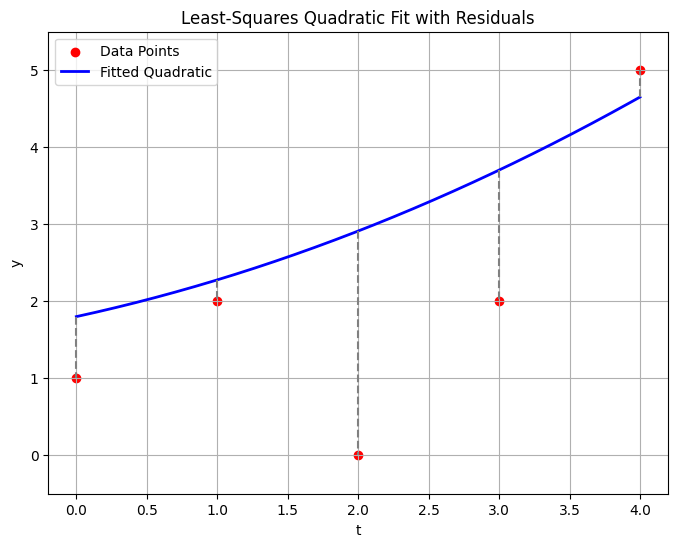

In [41]:
# Using previously computed alpha_val, beta_val, gamma_val
alpha_val = float(alpha_sol)
beta_val = float(beta_sol)
gamma_val = float(gamma_sol)

t_vals_np = np.array(t_vals)
y_vals_np = np.array(y_vals)

# Create a range of t-values for plotting the quadratic curve
t_min, t_max = min(t_vals_np), max(t_vals_np)
t_plot = np.linspace(t_min, t_max, 200)
y_fitted = alpha_val + beta_val * t_plot + gamma_val * (t_plot**2)

# Evaluate the fitted curve at the data points for residuals
y_fit_points = alpha_val + beta_val * t_vals_np + gamma_val * (t_vals_np**2)
residuals = y_vals_np - y_fit_points

# Plot the data points
plt.figure(figsize=(8,6))
plt.scatter(t_vals_np, y_vals_np, color='red', label='Data Points')

# Plot the fitted quadratic curve
plt.plot(t_plot, y_fitted, color='blue', linewidth=2, label='Fitted Quadratic')

# Draw residual lines
for tj, yj, y_fit in zip(t_vals_np, y_vals_np, y_fit_points):
    plt.plot([tj, tj], [y_fit, yj], color='gray', linestyle='--')

# Add labels, title, and legend
plt.xlabel('t')
plt.ylabel('y')
plt.title('Least-Squares Quadratic Fit with Residuals')
plt.grid(True)
plt.legend()

# Optionally, adjust the y-limits to show residuals more clearly
y_min = min(min(y_vals_np), min(y_fitted)) - 0.5
y_max = max(max(y_vals_np), max(y_fitted)) + 0.5
plt.ylim(y_min, y_max)

plt.show()

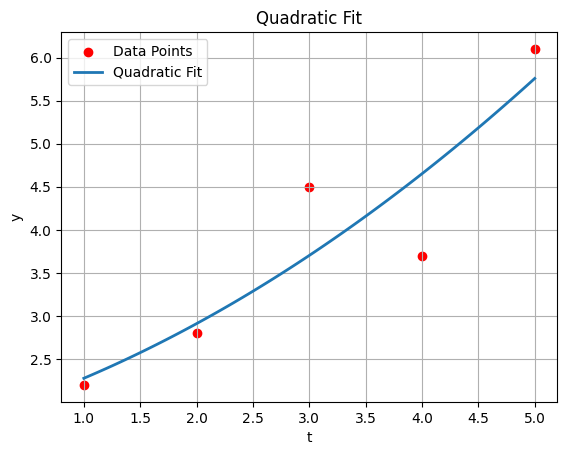

<IPython.core.display.Math object>

In [40]:
# Generate fit curve using the symbolic coefficients
t_fit = np.linspace(min(t), max(t), 100)
y_fit = alpha_sol + beta_sol * t_fit + gamma_sol * t_fit**2

# Plot the solution
plt.scatter(t, y_tilde, label='Data Points', color='red')
plt.plot(t_fit, y_fit, label='Quadratic Fit', linewidth=2)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Quadratic Fit')
plt.legend()
plt.grid()
plt.show()

# Render the symbolic fit equation
fit_eq = Eq(symbols('y'), alpha_sol + beta_sol * t_sym + gamma_sol * t_sym**2)
display(Math(f"\\text{{Quadratic Fit Equation: }} {latex(fit_eq)}"))

**Step 4: Graphical Visualization**

The fitted curve is plotted alongside the data points:

1. The data points $ (t_j, \tilde{y}_j) $ are shown in red.
2. The curve $ y(t) = 1.830 + 0.309 t + 0.230 t^2 $ is shown in blue.

---

**Conclusion**

The derived quadratic function $ y(t) = 1.830 + 0.309 t + 0.230 t^2 $ provides the best fit for the given dataset in the least-squares sense. The symbolic and numerical results validate the solution, and the graphical visualization confirms the fit.